# Methodology (Deliverable 3):
* Use X_encoded_dummies.csv to create dataframe of feature matrix (X)
* Note the extent of imbalance among values in the target variable (y)
* Pre-processing: set aside 25 % of the data for testing (using train-test-split)
* Note: BalancedRandomForestClassifier and EasyEnsembleClassifier(AdaBoost) do not require scaling of the feature matrix (X)
* Model, fit predict and assess the two ensemble learning methods

    - BalancedRandomForestClassifier
        * balanced accuracy score
        * confusion matrix
        * balanced classification report 
        * feature importantance (for BalancedRandomForestClassifier only) <br><br>
    
    - EasyEnsembleClassifier(AdaBoost)
        * balanced accuracy score
        * confusion matrix
        * balanced classification report <br><br>
        
* Record findings in README.md file to include images of confusion matrix, balanced classification report and feature importance (if applicable)        

## Preprocessing

### Import Libraries
Note: a new python 3.7 evnironment called mlenv was created for this analysis
Note: an additional libary dataframe_image was added to the mlenv environment

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt

import dataframe_image as dfi

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [5]:
# Load the clean_loans cvs file
file_path = Path('./Data/X_encoded_dummies.csv')
X = pd.read_csv(file_path)
X

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
0,20000.0,0.2250,769.00,75000.0,24.37,0.0,0.0,8.0,0.0,44934.0,...,0,0,0,1,0,1,0,1,1,0
1,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,0,0,0,1,0,1,0,1,1,0
2,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,1,0,0,1,0,1,0,1,1,0
3,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,1,0,0,1,0,1,0,1,1,0
4,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90440,40000.0,0.0646,1225.24,520000.0,9.96,0.0,1.0,21.0,0.0,59529.0,...,1,0,1,0,1,0,0,1,1,0
90441,6000.0,0.0646,183.79,96000.0,0.31,0.0,0.0,16.0,1.0,50.0,...,0,0,1,0,0,1,0,1,1,0
90442,16000.0,0.1614,563.62,32000.0,20.89,0.0,0.0,13.0,1.0,17066.0,...,0,0,1,0,1,0,0,1,1,0
90443,16000.0,0.1131,350.36,72000.0,7.02,2.0,0.0,12.0,1.0,11882.0,...,1,0,1,0,0,1,0,1,1,0


In [6]:
# examine the shape
X.shape

(90445, 84)

In [7]:
# Load y from the y.csv file in Data folder
y = pd.read_csv("./Data/y.csv")
y

,loan_status
0,low_risk
1,low_risk
2,low_risk
3,low_risk
4,low_risk
...,...
90440,low_risk
90441,low_risk
90442,low_risk
90443,low_risk


In [8]:
# confirm the shape of y
y.shape

(90445, 1)

### Split the Data into Training and Testing

In [9]:
# Examine the features matrix
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90445 entries, 0 to 90444
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            90445 non-null  float64
 1   int_rate                             90445 non-null  float64
 2   installment                          90445 non-null  float64
 3   annual_inc                           90445 non-null  float64
 4   dti                                  90445 non-null  float64
 5   delinq_2yrs                          90445 non-null  float64
 6   inq_last_6mths                       90445 non-null  float64
 7   open_acc                             90445 non-null  float64
 8   pub_rec                              90445 non-null  float64
 9   revol_bal                            90445 non-null  float64
 10  total_acc                            90445 non-null  float64
 11  out_prncp                   

In [10]:
# Create our target
# y = df['loan_status']
y.value_counts()

loan_status
low_risk       89971
high_risk        474
dtype: int64

In [11]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
count,90445.000000,90445.000000,90445.000000,9.044500e+04,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000,...,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000,90445.000000
mean,16850.657858,0.126075,485.472852,8.626649e+04,20.684663,0.228946,0.446514,11.929736,0.118945,18221.420300,...,0.155199,0.373243,0.448792,0.177965,0.122340,0.877660,0.383681,0.616319,0.861573,0.138427
std,10370.740982,0.048078,291.337225,1.094292e+05,19.376007,0.742990,0.738874,5.947032,0.329078,22842.607779,...,0.362097,0.483669,0.497374,0.382485,0.327679,0.327679,0.486284,0.486284,0.345349,0.345349
min,1000.000000,0.060000,30.640000,4.000000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9600.000000,0.081900,267.580000,5.000000e+04,12.630000,0.000000,0.000000,8.000000,0.000000,6438.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,15000.000000,0.118000,407.350000,7.000000e+04,18.770000,0.000000,0.000000,11.000000,0.000000,12402.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,24000.000000,0.150200,652.130000,1.000000e+05,25.920000,0.000000,1.000000,15.000000,0.000000,22366.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,40000.000000,0.308900,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,613796.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
0,20000.0,0.2250,769.00,75000.0,24.37,0.0,0.0,8.0,0.0,44934.0,...,0,0,0,1,0,1,0,1,1,0
1,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,0,0,0,1,0,1,0,1,1,0
2,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,1,0,0,1,0,1,0,1,1,0
3,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,1,0,0,1,0,1,0,1,1,0
4,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,1,0,0,1,0,1,0,1,1,0


In [13]:
X.shape

(90445, 84)

In [14]:
# # use get_dummies to transform object dtypes into int 
# X_encoded = pd.get_dummies(X)
# X_encoded.shape

In [15]:
# Check the balance of our target values
# y['loan_status'].value_counts()

In [16]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [17]:
# examine y_train counts
y_train.value_counts()

loan_status
low_risk       67488
high_risk        345
dtype: int64

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [18]:
# Resample the training data with the BalancedRandomForestClassifier

# model
brf_model = BalancedRandomForestClassifier(n_estimators= 100,random_state=1)

# fit
brf_model = brf_model.fit(X_train, y_train)

# predict
predictions = brf_model.predict(X_test)

In [19]:
# Calculated the balanced accuracy score
print(f"The balanced accuracy score is: {balanced_accuracy_score(y_test, predictions):.3f}")

The balanced accuracy score is: 0.783


In [20]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[   82,    47],
       [ 1559, 20924]], dtype=int64)

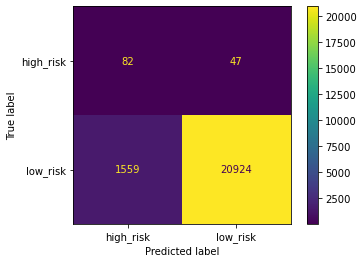

In [21]:
# confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= brf_model.classes_)
disp.plot()

# save the image
plt.savefig("./Images/BalancedRandomForestClassifier_confusion_matrix.png")
plt.show()

In [22]:
# Print the imbalanced classification report
report = classification_report_imbalanced(y_test, predictions)
print("BalancedRandomForestClassifier")
print(report)

BalancedRandomForestClassifier
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.05      0.64      0.93      0.09      0.77      0.57       129
   low_risk       1.00      0.93      0.64      0.96      0.77      0.61     22483

avg / total       0.99      0.93      0.64      0.96      0.77      0.61     22612



In [23]:
# List the features sorted in descending order by feature importance
importance_features = brf_model.feature_importances_

# put this together in a dataframe
# get the column names
cols = X.columns

# create the dataframe
importance_features_df = pd.DataFrame({'feature': cols, 'importance': importance_features})
importance_features_df

,feature,importance
0,loan_amnt,0.010349
1,int_rate,0.029844
2,installment,0.017238
3,annual_inc,0.020549
4,dti,0.019644
...,...,...
79,initial_list_status_w,0.000864
80,next_pymnt_d_Apr-2019,0.005970
81,next_pymnt_d_May-2019,0.005640
82,application_type_Individual,0.001403


In [24]:
# sort in desc order
print("Feature Importance BalancedRandomForestClassifier")
top_ten_importance_features_df = importance_features_df.sort_values('importance', ascending=False).head(10)
top_ten_importance_features_df.reset_index(drop=True, inplace=True)
top_ten_importance_features_df

Feature Importance BalancedRandomForestClassifier


,feature,importance
0,total_rec_prncp,0.078640
1,last_pymnt_amnt,0.076534
2,total_pymnt_inv,0.074908
3,total_pymnt,0.065603
4,total_rec_int,0.060210
5,int_rate,0.029844
6,annual_inc,0.020549
7,dti,0.019644
8,issue_d_Jan-2019,0.018887
9,out_prncp_inv,0.017786


In [25]:
# save the dataframe using import dataframe_image as dfi
# dfi.export(df_styled, 'df_styled.png')
dfi.export(top_ten_importance_features_df, 'top_ten_feature_importance_df.png')


### Easy Ensemble AdaBoost Classifier

In [26]:
# Train the EasyEnsembleClassifier

# model
ee_clf = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# fit/train
ee_clf.fit(X_train, y_train)

# predict
y_pred = ee_clf.predict(X_test)

In [27]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.9014869805162005

In [28]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  109,    20],
       [  944, 21539]], dtype=int64)

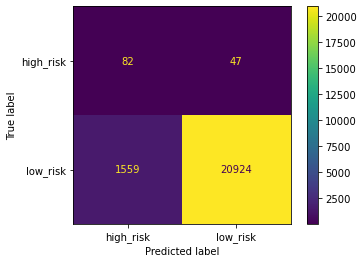

In [29]:
# confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ee_clf.classes_)
disp.plot()

# save the image
plt.savefig("./Images/EasyEnsembleClassifier_confusion_matrix.png")
plt.show()

In [30]:
# Print the imbalanced classification report
print("EasyEnsembleClassifier")
print(classification_report_imbalanced(y_test, y_pred))

EasyEnsembleClassifier
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.10      0.84      0.96      0.18      0.90      0.80       129
   low_risk       1.00      0.96      0.84      0.98      0.90      0.82     22483

avg / total       0.99      0.96      0.85      0.97      0.90      0.82     22612



## Analysis of Ensemble Methods